# 14주차 2강 실습

## 1. 프로야구 연봉 데이터 살펴보기

### [ 프로야구 연봉 데이터셋의 기본 정보 ]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import csv

warnings.filterwarnings("ignore")

In [13]:
picher_file_path = 'data/picher_stats_2017.csv'
batter_file_path = 'data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path, sep = ',', encoding='utf8')
batter = pd.read_csv(batter_file_path, sep = ',', encoding='utf8')

picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [14]:
print(picher.shape)
print(batter.shape)

(152, 22)
(191, 21)


In [15]:
picher.head(10)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
5,피어밴드,KT,8,10,0,0,0,26,26,160.0,...,1.12,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000
6,고영표,KT,8,12,0,1,0,25,24,141.2,...,0.83,0.362,64.6,5.08,2.97,3.88,3.78,3.87,11500,5200
7,장원준,두산,14,9,0,0,0,29,29,180.1,...,0.60,0.293,75.8,3.14,7.28,4.26,4.35,3.85,100000,100000
8,함덕주,두산,9,8,0,2,0,35,24,137.1,...,0.52,0.321,73.1,3.67,4.99,3.91,3.67,3.78,16000,7000
9,팻딘,KIA,9,7,0,0,0,30,29,176.0,...,1.12,0.353,76.5,4.14,5.66,4.65,4.61,3.64,70000,70000


In [16]:
picher.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   선수명       152 non-null    object 
 1   팀명        152 non-null    object 
 2   승         152 non-null    int64  
 3   패         152 non-null    int64  
 4   세         152 non-null    int64  
 5   홀드        152 non-null    int64  
 6   블론        152 non-null    int64  
 7   경기        152 non-null    int64  
 8   선발        152 non-null    int64  
 9   이닝        152 non-null    float64
 10  삼진/9      152 non-null    float64
 11  볼넷/9      152 non-null    float64
 12  홈런/9      152 non-null    float64
 13  BABIP     152 non-null    float64
 14  LOB%      152 non-null    float64
 15  ERA       152 non-null    float64
 16  RA9-WAR   152 non-null    float64
 17  FIP       152 non-null    float64
 18  kFIP      152 non-null    float64
 19  WAR       152 non-null    float64
 20  연봉(2018)  152 non-null    int64 

## 2. 예측 대상 Y값 분포 출력하기

In [18]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

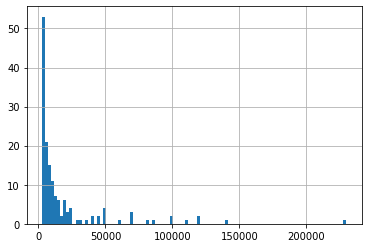

In [19]:
picher['연봉(2018)'].hist(bins = 100)

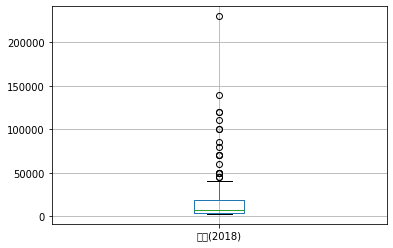

In [20]:
picher.boxplot(column = ['연봉(2018)'])

### [ 회귀 분석에 사용할 피처 살펴보기 ]

In [35]:
picher_features_df = picher[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 
                             'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)', '연봉(2017)']]

picher_features_df

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [36]:
# 피처 각각에 대한 bistogram을 출력한다.
def plot_hist_each_column(df):
        plt.rcParams['figure.figsize'] = [20, 16]
        fig = plt.figure
        
        # df의 column 갯수 만큼의 subplot을 출력한다.
        for i in range(len(df.columns)):
            ax = fig.add_subplot(5, 5, i+1)
            plt.hist(df[df.columns[i]], bins = 50)
            ax.set_title(df.columns[i])
        plt.show()
plot_hist_each_column(picher_features_df)

AttributeError: 'function' object has no attribute 'add_subplot'

# 14주차 3강 실습

## 1. 투수의 연봉 예측하기

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

picher_file_path = 'data/picher_stats_2017.csv'
batter_file_path = 'data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path, sep = ',', encoding='utf8')
batter = pd.read_csv(batter_file_path, sep = ',', encoding='utf8')

### [ 피처들의 단위 맞춰주기 : 피처 스케일링 ]

In [40]:
pd.options.mode.chained_assignment = None

def standard_scailng(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (s-series_mean)/series_std)
    return df

# 피처 각각에 대한 scaling을 수행한다.
scale_columns = ['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 
                             'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.renamd(columns = {'연봉(2018)' : 'y'}
picher_df.head(10)

SyntaxError: unexpected EOF while parsing (<ipython-input-40-3188ebd227d5>, line 15)

### [ 피처들의 단위 맞춰주기 : one-hot-encoding ]

In [41]:
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명', axis = 1)
picher_df = picher.df.join(team_encoding)
team_encoding.head(5)

NameError: name 'picher_df' is not defined

In [42]:
picher_df.head()

NameError: name 'picher_df' is not defined

### [ 회귀 분석 적용하기 ]

#### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [43]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리한다.
X = picher_df[picher_df.columns.difference(['선수명', 'y'])] 
Y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

NameError: name 'picher_df' is not defined

#### 회귀 분석 계수 학습 & 학습된 계수 출력

In [44]:
lr = linear_model_LinearRegression()
model = lr.fit(X_train, y_train)
print(lr.coef_)

NameError: name 'linear_model_LinearRegression' is not defined

In [45]:
picher_df.columns

NameError: name 'picher_df' is not defined

## 2. 예측 모델 평가하기

In [46]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산한다.
corr = picher_df[scale_columns].corr(method = 'pearson')
show_cols = ['win', 'lose', 'save', 'hold', 'blon', 'match', 'start'
             ,'inning', 'strike3', 'ball4', 'homerun', 'BABIP', 'LOB',
              'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '2017']

# corr 행렬 히트맵을 시각화한다.
plt.rc('font', family = 'NanumGothicOTF')
sns.set(font_scale = 1.5)
hm = sns.heatmap(corr.values, cbar=True, annot=True, square=True,
                              fmt='.2f', annot_kws={'size':15},
                              yticklabels=show_cols, xticklabels=show_cols)

plt.tight_layout()
plt.show()

NameError: name 'picher_df' is not defined